# Pymaceuticals Inc.
---
### Analysis

Review of the Summary Table DataFrame shows that both Capomulin and Ramicane were the most effective drugs at slowing the rate of SCC tumor growth when compared to the other drugs in the study. Both drugs also showed consistency in their efficacy across all Mouse ID's in slwoing rate of tumor growth by displaying the lowest variance of tumor volume across all Mouse ID's.
There is a very strong correlation between a mouse's weight and the size of its tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combined_data_df["Mouse ID"].unique()
len(number_of_mice)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ids = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
# duplicated_mice_ids = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicated_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

249

In [7]:
len(cleaned_df)

1888

In [8]:
# mouseg989 = cleaned_df.loc[cleaned_df["Mouse ID"] == "g989"]
mouseg989 = cleaned_df.iloc[135:141]
mouseg989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
135,d133,0,45.0,0,Zoniferol,Male,5,30
136,n630,0,45.0,0,Propriva,Female,15,29
138,a401,0,45.0,0,Zoniferol,Female,8,25
139,w350,0,45.0,0,Propriva,Male,7,26
140,c302,0,45.0,0,Zoniferol,Female,10,29
141,a897,0,45.0,0,Placebo,Male,7,28


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_table_df = pd.DataFrame({"Mean Tumor Volume": means,
                             "Median Tumor Volume": medians,
                             "Tumor Volume Variance": variances,
                             "Tumor Volume Std. Dev.": std_dev,
                             "Tumor Volume Std. Err.": sems})
summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
sorted_tumor_volume = summary_table_df.sort_values(by="Mean Tumor Volume")
sorted_tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Applying different aggregation functions to the same column through the use of
# a dictionary .aggregate({"column": "function[s]", "column": "function[s]"})
summary_table = cleaned_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

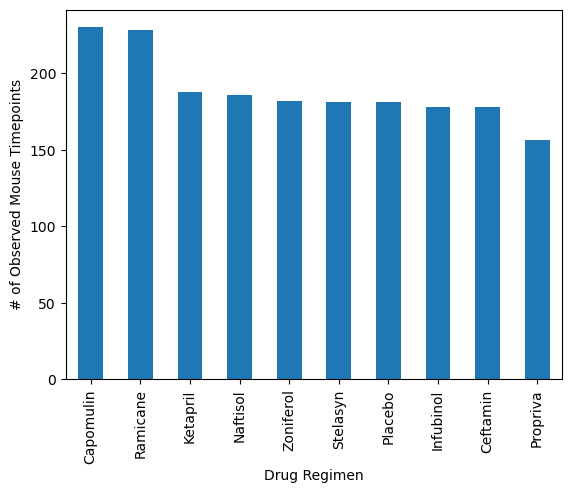

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mice_treatments = cleaned_df["Drug Regimen"].value_counts()
# total_mice_treatments
total_mice_treatments.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [13]:
total_mice_treatments.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156])

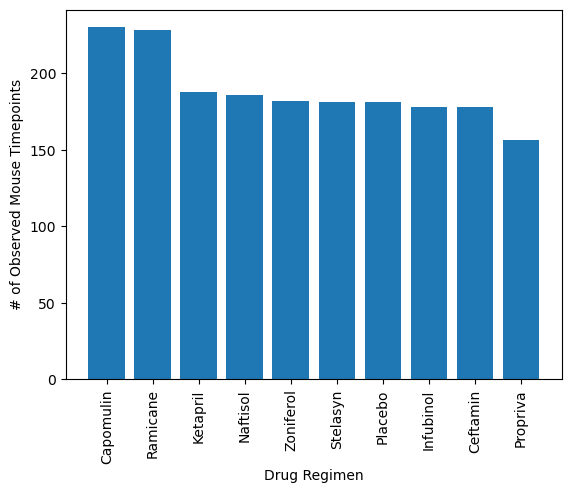

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(total_mice_treatments))
y_axis = total_mice_treatments.values
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, total_mice_treatments.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

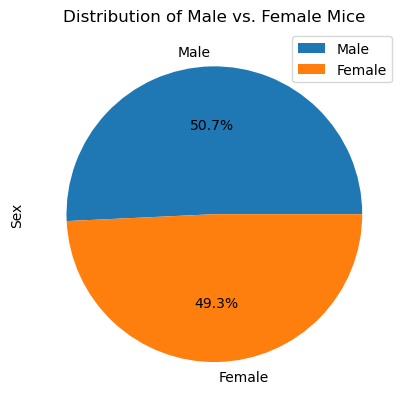

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df["Sex"].value_counts()
#gender_counts
gender_pie_pandas = gender_counts.plot(kind="pie", autopct="%1.1f%%", title = "Distribution of Male vs. Female Mice")
plt.ylabel("Sex")
plt.legend()
plt.show()

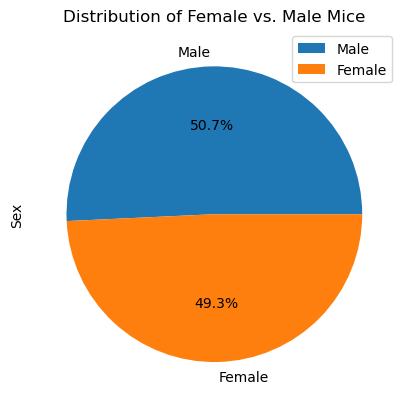

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, autopct="%1.1f%%", labels=gender_counts.index)
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("Sex")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
greatest_timepoints = cleaned_df.groupby("Mouse ID")["Timepoint"].max()
#greatest_timepoints

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints_df = greatest_timepoints.reset_index()
# greatest_timepoints_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = greatest_timepoints_df.merge(cleaned_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound)|(tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


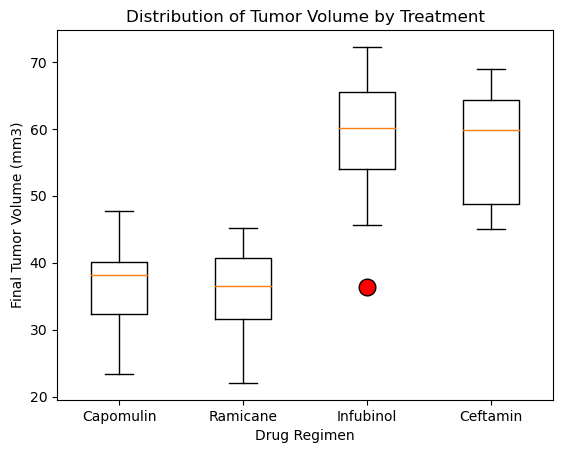

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 12,
                 markeredgecolor = "black")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Distribution of Tumor Volume by Treatment")
ax1.boxplot(tumor_vol_list, labels = treatments_list, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

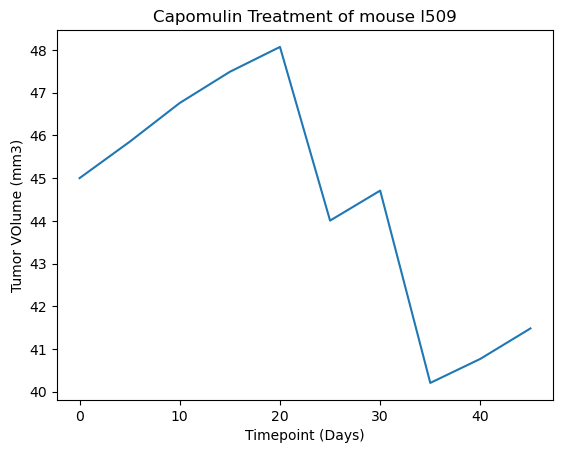

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df

# Get the data for a specific Mouse ID = "l509" per Starter Code
l509mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509"]
l509mouse_df
plt.plot(l509mouse_df["Timepoint"], l509mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor VOlume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
plt.show()

In [21]:
l509mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509"]
l509mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


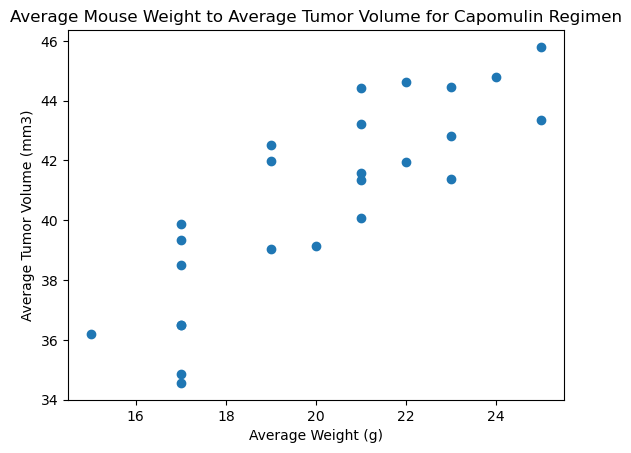

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_avg_df = capomulin_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
# capomulin_avg
plt.scatter(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"])
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Mouse Weight to Average Tumor Volume for Capomulin Regimen")
plt.show()

In [23]:
capomulin_avg_df

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


## Correlation and Regression

The correlation between average weight and average tumor volume is 0.84
The regression equation is: y = 0.95x + 21.55


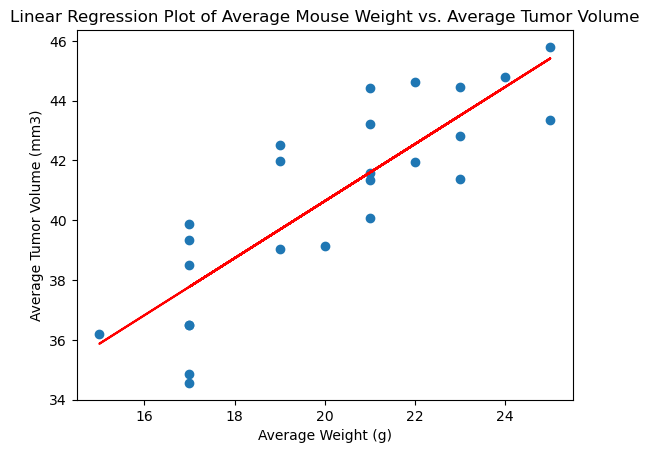

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
    # See Data Visualization, Day 3, Activity 6, for Pearson correlation coefficient
correlation = st.pearsonr(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"]) 
print(f"The correlation between average weight and average tumor volume is {round(correlation[0],2)}")

# Perform a linear regression on Average Weight vs. Average Tumor Volume
    # See Data Visualization, Day 3, Activity 8 and 9, for linear regression
x_values = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression Plot of Average Mouse Weight vs. Average Tumor Volume")
plt.show()